<a href="https://colab.research.google.com/github/saiachanta21/Iris-Flowers-Classification/blob/main/Iris_Flowers_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [115]:
df=pd.read_csv("/content/Iris.csv")

In [116]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [118]:
df.shape

(150, 6)

In [119]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [120]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [122]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [123]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [124]:
df.drop('Id',axis=1,inplace=True)

In [125]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [126]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [127]:
df['Species']=df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [128]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [129]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

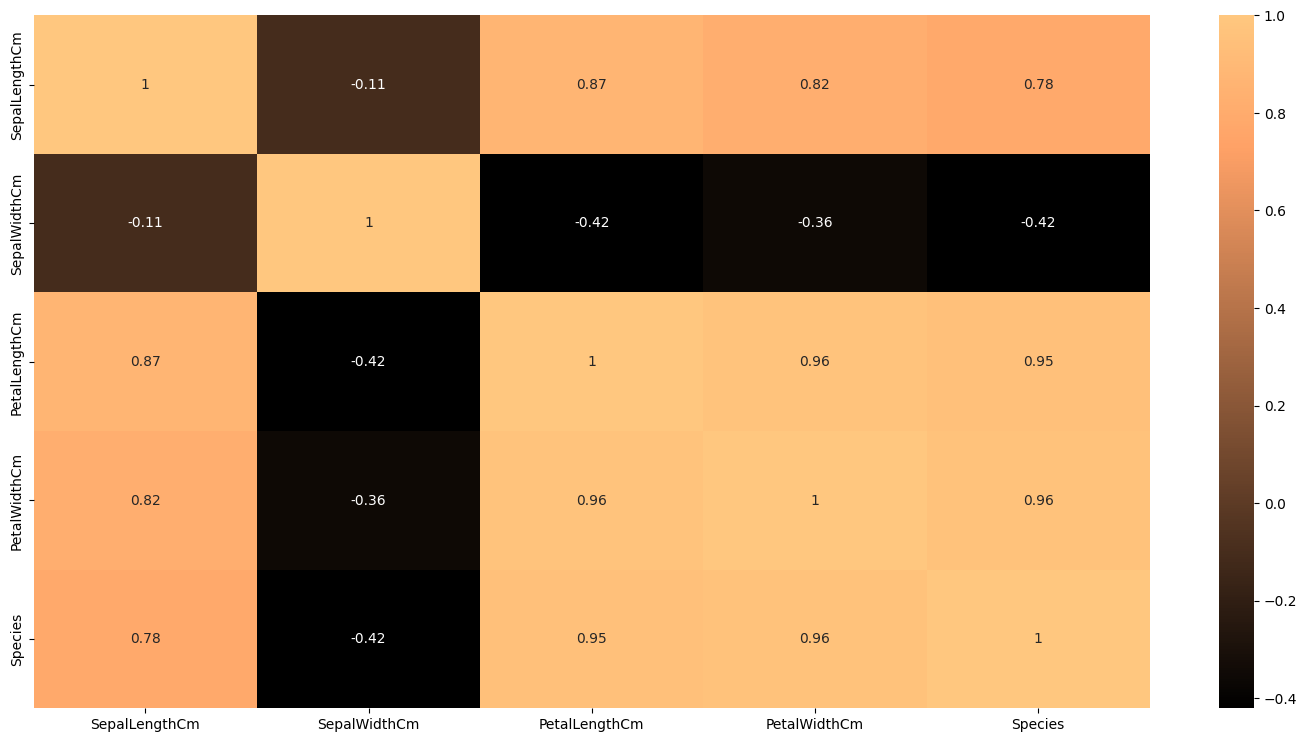

In [130]:
corr = df.corr()
plt.figure(figsize=(18,9))
sns.heatmap(corr,cmap='copper',annot=True)

<Axes: >

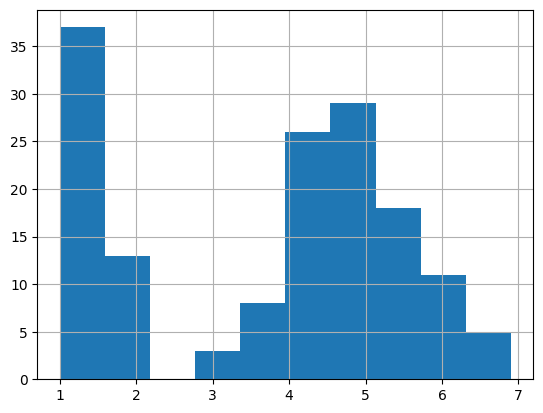

In [131]:
df['PetalLengthCm'].hist()

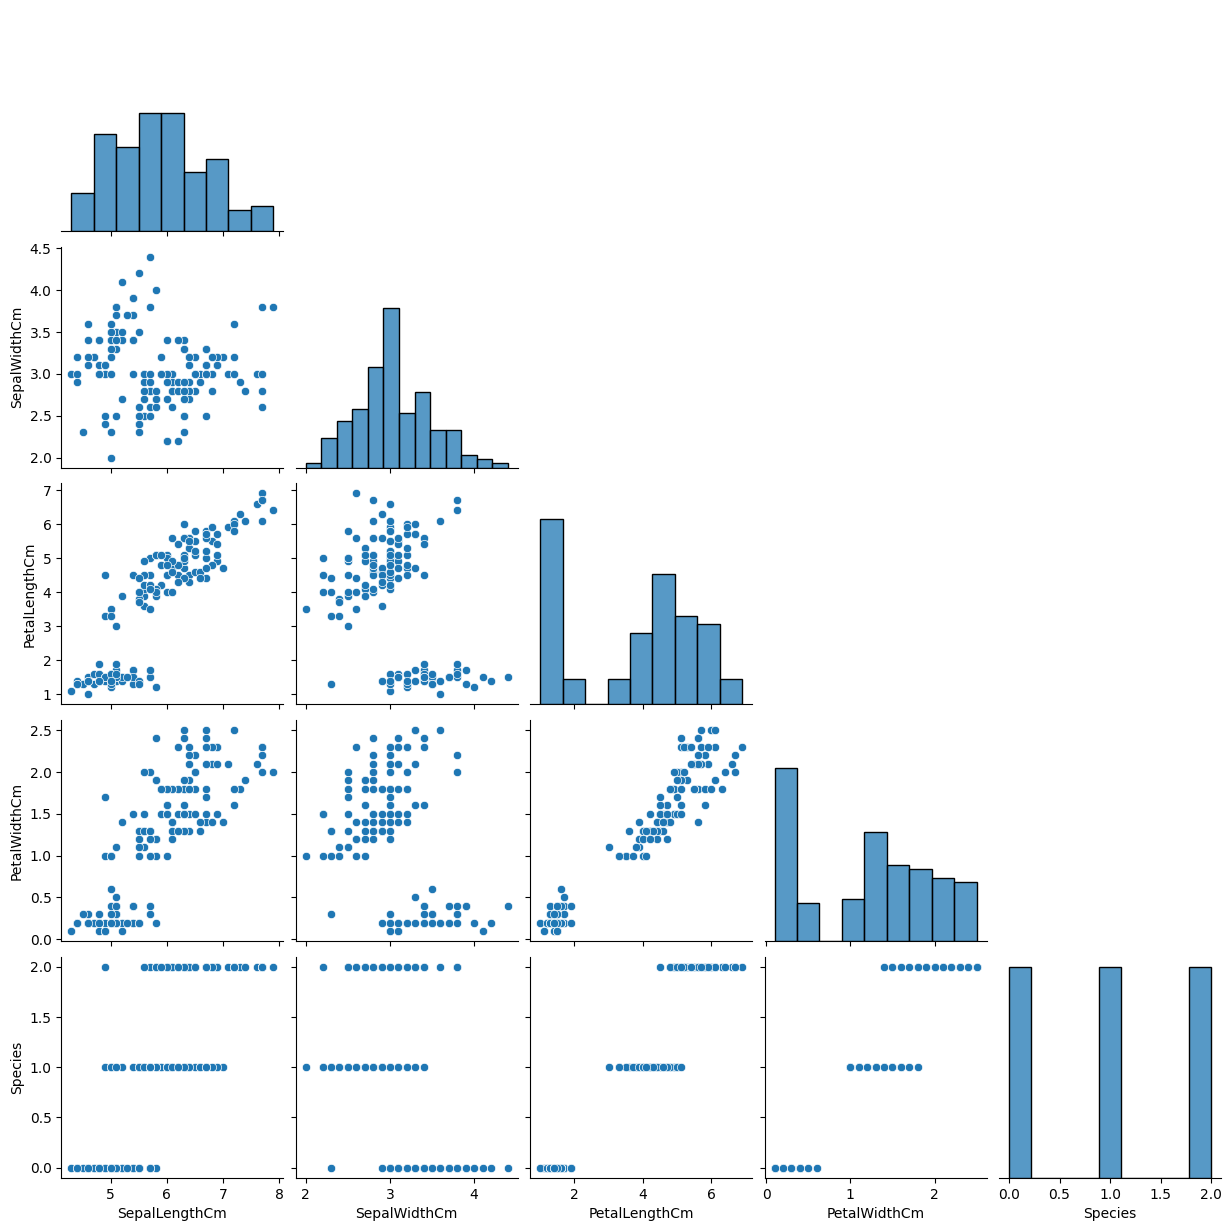

In [132]:
sns.pairplot(df,corner=True)
plt.show()

In [133]:
fig=px.pie(df,values='Species',names='SepalLengthCm')
fig.show()

<Axes: ylabel='Species'>

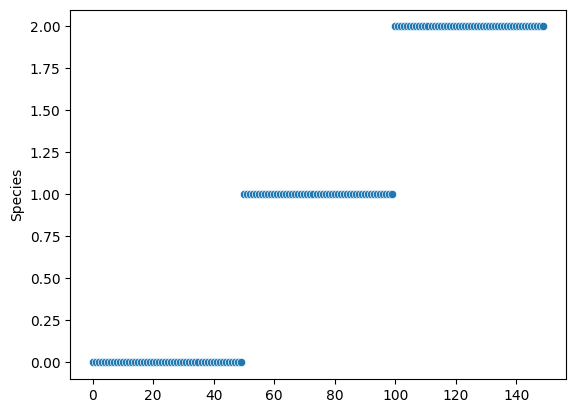

In [134]:
sns.scatterplot(data=df['Species'])

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

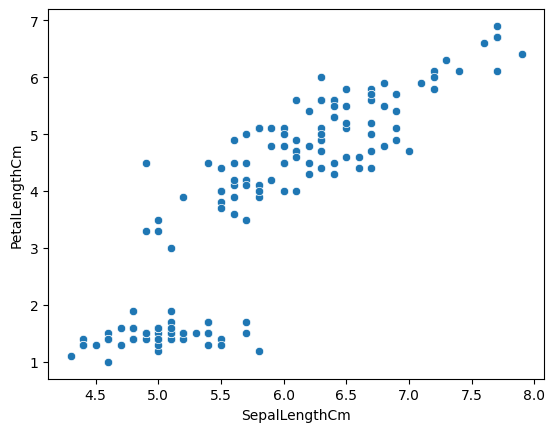

In [135]:
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df)

<Axes: ylabel='Frequency'>

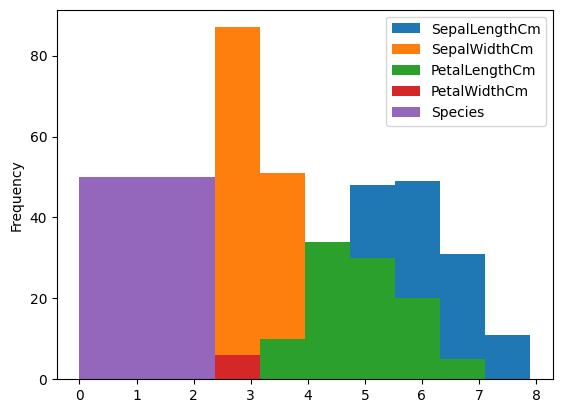

In [136]:
df.plot(kind='hist')

In [137]:
# Separate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [138]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [139]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [153]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
acc=(accuracy_score(y_test, predictions)*100)
acc

96.66666666666667

In [141]:

from sklearn.neighbors import KNeighborsClassifier

In [142]:
classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [154]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(X_test)


# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)

Accuracy: 96.66666666666667


In [144]:
con=confusion_matrix(y_test,predictions)
con

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 12]])

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [146]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [147]:
ypred_dt=dt.predict(X_test)
conf=confusion_matrix(y_test,ypred_dt)
conf

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 12]])

In [148]:
accuracy = accuracy_score(y_test,ypred_dt)*100
print("Accuracy:", accuracy)

Accuracy: 96.66666666666667


In [149]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [150]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
ypred_rf=rf.predict(X_test)
conf=confusion_matrix(y_test,ypred_rf)
conf

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 12]])

In [152]:
accuracy = accuracy_score(y_test,ypred_rf)*100
print("Accuracy:", accuracy)

Accuracy: 96.66666666666667
